In [1]:
from sweep_utils import * 

In [2]:
param_configs = "../param_configs/attn_fista_rho_mu_sweep_20it_prior_mv.json"
script_name = "../scripts/run_fineweb1B_adam_fista_momentum.sh"
df, missing = load_sweep_jsons(param_configs, script_name)

Some files are missing: 
{'attn_fista_adamw-lr-0.001-constant-linear-e690c71d0c02f2cf39cb133aec03bb99.json', 'attn_fista_adamw-lr-0.001-constant-linear-c4616d37c2466448c120c5fc763fca56.json', 'attn_fista_adamw-lr-0.001-constant-linear-a458f33f0d1fd70831052c4cc408ab0b.json', 'attn_fista_adamw-lr-0.001-constant-linear-8de405ef47d1c4e06925e2be93400d95.json', 'attn_fista_adamw-lr-0.001-constant-linear-bae11d033f01162a38de9888a811ae2a.json', 'attn_fista_adamw-lr-0.001-constant-linear-d69a701dceff2afc242bba1d2b36d05e.json', 'attn_fista_adamw-lr-0.001-constant-linear-b686d2ca05b27ee4191af4fb814e3d4e.json', 'attn_fista_adamw-lr-0.001-constant-linear-d4ba4491acfb8a6eff648d13e0c02e54.json', 'attn_fista_adamw-lr-0.001-constant-linear-bbb394eaf140c833f61311c1acc144e9.json', 'attn_fista_adamw-lr-0.001-constant-linear-52540012ede2c58c69e7e854457f84ac.json', 'attn_fista_adamw-lr-0.001-constant-linear-2320ba438ee5afd945c9749f3c148652.json', 'attn_fista_adamw-lr-0.001-constant-linear-373b8d8658926dd65c

In [3]:
df[:5]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,attn_max_iter,attn_momentum,lr,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.001508,3.988936,3.988936,280.000,176.000,179.087733,20,prior_mv,0.001,False,0.5,0.5,False
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.982838,3.970553,3.970553,197.000,123.500,122.736588,20,prior_mv,0.001,False,0.1,0.1,False
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.246044,4.234925,4.234925,27.875,22.375,21.081027,20,prior_mv,0.001,False,0.1,0.01,False
3,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.572165,7.557628,7.569782,182272.000,152576.000,128367.183811,20,prior_mv,0.001,False,0.001,0.1,False
4,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.975935,3.964882,3.964882,756.000,495.000,496.683196,20,prior_mv,0.001,False,0.005,0.01,False


In [4]:
sorted(df["mu_frac"].unique()), sorted(df["rho_over_lr"].unique())

(['0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '0.75'],
 ['0.01', '0.1', '0.5'])

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


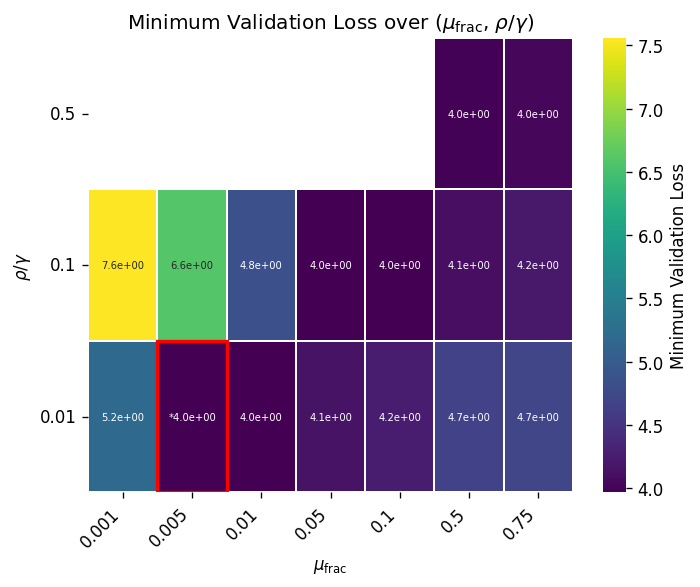

In [5]:
plot_heatmat_grid(df, value="min_val_loss")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


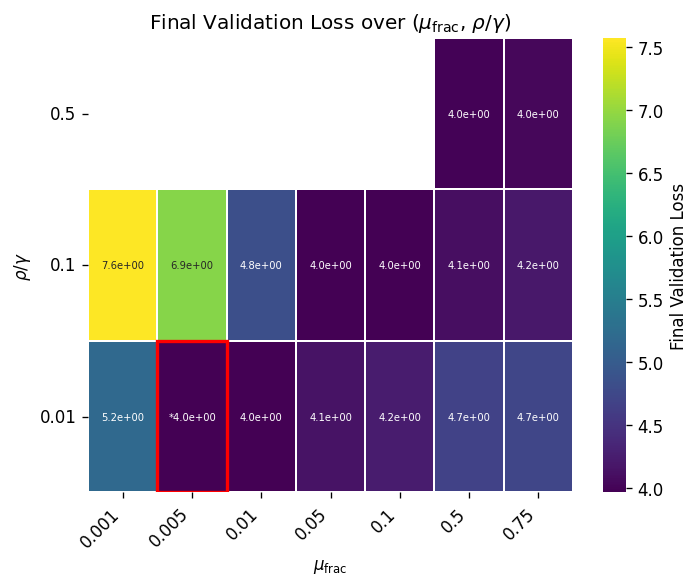

In [6]:
plot_heatmat_grid(df, value="fin_val_loss")

In [7]:
cols = ["min_val_loss", "kq_max", "mu_frac", "rho_over_lr"]
top10 = df.dropna(subset=cols).nsmallest(10, "min_val_loss")[cols].reset_index(drop=True)
print(top10)

   min_val_loss   kq_max mu_frac rho_over_lr
0      3.964882  756.000   0.005        0.01
1      3.967524  732.000    0.05         0.1
2      3.969220  178.000    0.01        0.01
3      3.970553  197.000     0.1         0.1
4      3.988936  280.000     0.5         0.5
5      4.025046  169.000    0.75         0.5
6      4.104201   37.750     0.5         0.1
7      4.138532   41.250    0.05        0.01
8      4.193808   31.125    0.75         0.1
9      4.234925   27.875     0.1        0.01


/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


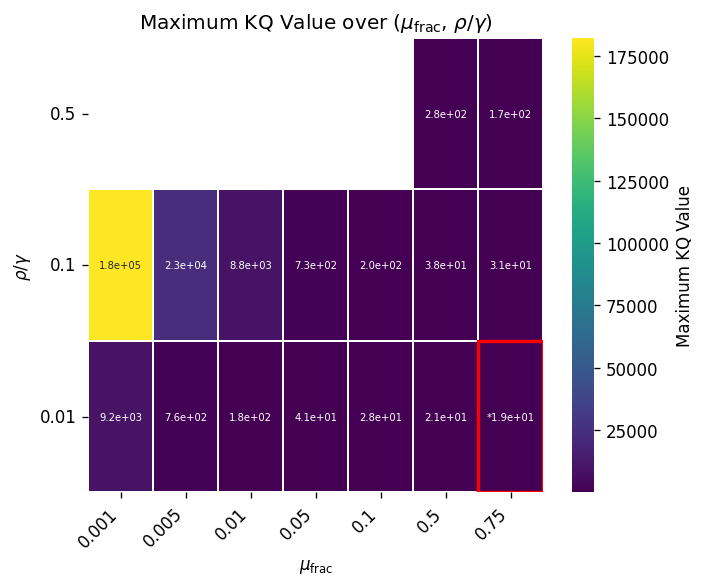

In [8]:
plot_heatmat_grid(df, value="kq_max")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


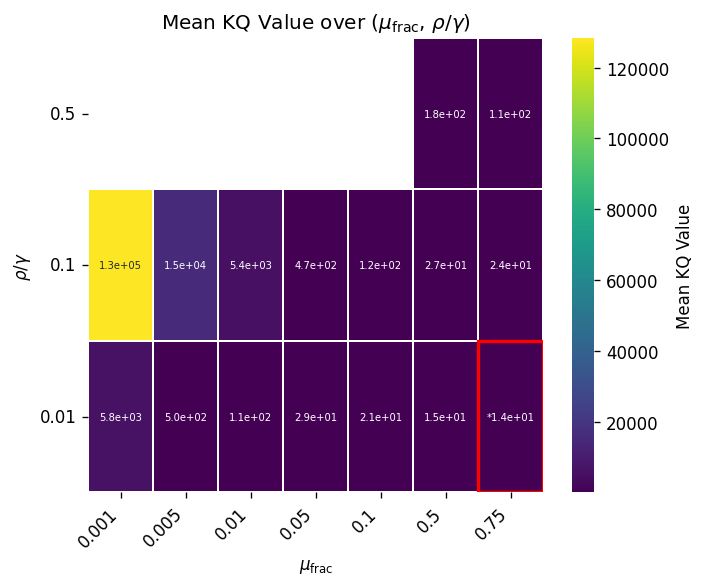

In [9]:
plot_heatmat_grid(df, value="kq_mean")